<a href="https://colab.research.google.com/github/howsam/blog/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))  # Flatten to 784 dimensions
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Autoencoder model
input_dim = 784  # 28*28 flattened images
encoding_dim = 32  # Dimension of the latent space (compressed representation)

# Encoder
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# Full autoencoder
autoencoder = models.Model(input_img, decoded)

In [4]:
# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
# Train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.3843 - val_loss: 0.1873
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1785 - val_loss: 0.1539
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.1492 - val_loss: 0.1332
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1314 - val_loss: 0.1205
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1193 - val_loss: 0.1124
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1121 - val_loss: 0.1066
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1065 - val_loss: 0.1022
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1025 - val_loss: 0.0988
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0996 - val_loss: 0.0966
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0974 - val_loss: 0.0950
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0962 - val_loss: 0.0941
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━

In [6]:
# After training, use the autoencoder to make predictions (compression and decompression)
reconstructed_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


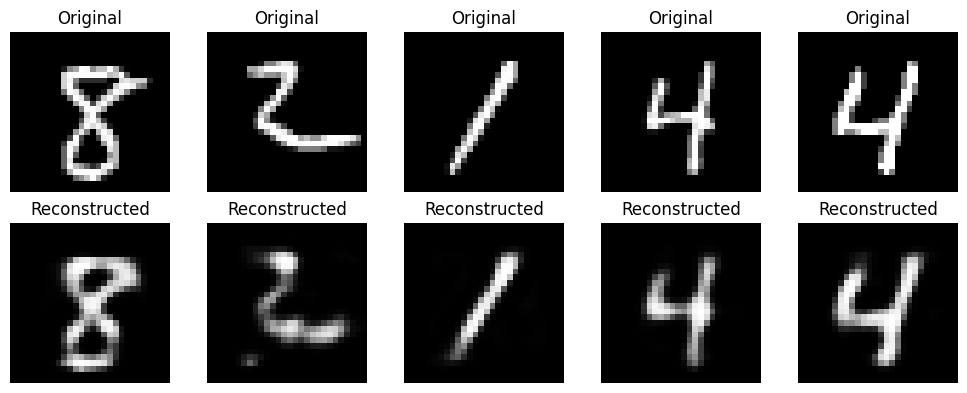

In [7]:
# Number of images to display
num_images = 5

# Randomly select some indices
random_indices = np.random.randint(x_test.shape[0], size=num_images)

# Plotting
plt.figure(figsize=(10, 4))

for i, idx in enumerate(random_indices):
    # Original images (1st row)
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images (2nd row)
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed_imgs[idx].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()